classifico il dataset dove ho rimosso i record anomali di current loan amount

#IMPORT DATASET

In [0]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
df = pd.read_csv('/content/drive/My Drive/PROGETTO DATA MINING 1/loan_status_removed.csv')
df.drop(df.columns[df.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)


class_name = 'Loan Status'

df

,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,Fully Paid,262328.0,Short Term,721.638848,1.372699e+06,10+ years,Home Mortgage,Debt Consolidation,33295.98,21.1,35.0,0.0,229976.0,850784.0,0.0,0.0
1,Fully Paid,176220.0,Short Term,721.638848,1.372699e+06,5 years,Rent,Debt Consolidation,20639.70,6.1,15.0,0.0,253460.0,427174.0,0.0,0.0
2,Charged Off,206602.0,Short Term,729.000000,8.968570e+05,10+ years,Home Mortgage,Debt Consolidation,16367.74,17.3,6.0,0.0,215308.0,272448.0,0.0,0.0
3,Fully Paid,217646.0,Short Term,730.000000,1.184194e+06,< 1 year,Home Mortgage,Debt Consolidation,10855.08,19.6,13.0,1.0,122170.0,272052.0,1.0,0.0
4,Charged Off,648714.0,Long Term,721.638848,1.372699e+06,< 1 year,Home Mortgage,Buy House,14806.13,8.2,15.0,0.0,193306.0,864204.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68048,Charged Off,429132.0,Short Term,721.638848,1.372699e+06,10+ years,Home Mortgage,Debt Consolidation,28948.02,16.3,16.0,0.0,485279.0,656414.0,0.0,0.0
68049,Fully Paid,48796.0,Short Term,721.638848,1.372699e+06,4 years,Home Mortgage,major_purchase,8298.63,8.3,9.0,0.0,87875.0,239404.0,0.0,0.0
68050,Fully Paid,210584.0,Short Term,719.000000,7.833890e+05,1 year,Home Mortgage,Other,3727.61,17.4,6.0,0.0,456.0,259160.0,0.0,0.0
68051,Fully Paid,103136.0,Short Term,742.000000,1.150545e+06,6 years,Rent,Debt Consolidation,7315.57,18.8,12.0,1.0,109554.0,537548.0,1.0,0.0


#GESTIONE DELLE VARIABILI CATEGORIALI

In [5]:
from sklearn.preprocessing import LabelEncoder

lb_make = LabelEncoder()
#df['Loan Status'] = lb_make.fit_transform(df['Loan Status'])

df['Term'] = lb_make.fit_transform(df['Term'])

df['Years in current job'] = lb_make.fit_transform(df['Years in current job'])

df['Home Ownership'] = lb_make.fit_transform(df['Home Ownership'])

df['Purpose'] = lb_make.fit_transform(df['Purpose'])


df.head()

,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,Fully Paid,262328.0,1,721.638848,1.372699e+06,1,0,3,33295.98,21.1,35.0,0.0,229976.0,850784.0,0.0,0.0
1,Fully Paid,176220.0,1,721.638848,1.372699e+06,5,2,3,20639.70,6.1,15.0,0.0,253460.0,427174.0,0.0,0.0
2,Charged Off,206602.0,1,729.000000,8.968570e+05,1,0,3,16367.74,17.3,6.0,0.0,215308.0,272448.0,0.0,0.0
3,Fully Paid,217646.0,1,730.000000,1.184194e+06,10,0,3,10855.08,19.6,13.0,1.0,122170.0,272052.0,1.0,0.0
4,Charged Off,648714.0,0,721.638848,1.372699e+06,10,0,1,14806.13,8.2,15.0,0.0,193306.0,864204.0,0.0,0.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68053 entries, 0 to 68052
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Loan Status                68053 non-null  object 
 1   Current Loan Amount        68053 non-null  float64
 2   Term                       68053 non-null  int64  
 3   Credit Score               68053 non-null  float64
 4   Annual Income              68053 non-null  float64
 5   Years in current job       68053 non-null  int64  
 6   Home Ownership             68053 non-null  int64  
 7   Purpose                    68053 non-null  int64  
 8   Monthly Debt               68053 non-null  float64
 9   Years of Credit History    68053 non-null  float64
 10  Number of Open Accounts    68053 non-null  float64
 11  Number of Credit Problems  68053 non-null  float64
 12  Current Credit Balance     68053 non-null  float64
 13  Maximum Open Credit        68053 non-null  flo

In [7]:
df['Loan Status'].value_counts()

Fully Paid     45426
Charged Off    22627
Name: Loan Status, dtype: int64

# Evaluating the Performance of a Classifier



In order to evaluate the quality of classification there exist several measures: all of them built upon the concept of **Confusion Matrix**.

**Confusion Matrix**
In the field of machine learning a confusion matrix is a specific table layout that allows visualization of the performance of an algorithm. Each row of the matrix represents the instances in a predicted class while each column represents the instances in an actual class (or vice versa).

<img align="right" width="300" src="https://rasbt.github.io/mlxtend/user_guide/evaluate/confusion_matrix_files/confusion_matrix_1.png">

Given a Target class:
* ***True Positive (TP)*** represent those instances correctly predicted to be True
* ***False Positive (FP)*** represent those instances incorrectly predicted to be True
* ***True Negative (TN)*** represent those instances correctly predicted to be False
* ***False Negative (FT)*** represent those instances incorrectly predicted to be False 

Upon such classes are built several indicators.
Among the otehrs, two scores characterize the outcome of a predictive model: ***precision*** and ***recall***

* **Precision**: how many of the instances I predict to be True are really True? $\mathit{precision} = \frac{TP}{TP+FP}$
* **Recall**: how many True instances I was able to correctly predict? $\mathit{recall} = \frac{TP}{TP+FN}$

To summarize the overall performance of a model we can also use the ***accuracy*** and the ***f1-score***: 

* The **accuracy** $= \frac{TP+TN}{TP+TN+FP+FN}$ captures the number of instances correctly classified above all
* $1-\mathit{accuracy}$ gives the errore rate, i.e., the error committed by the classifier.
* The **f1-score** $= \frac{2TP}{2TP+FP+FN}$ describes the armonic mean of precision and recall.

All these indicators are provided by [sklearn](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics).

# Decision Tree in Python  ([sklearn](http://scikit-learn.org/stable/modules/tree.html))

In [0]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

Split the dataset into train and test

In [0]:
attributes = [col for col in df.columns if col != 'Loan Status']
X = df[attributes].values
y = df['Loan Status']

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.3, 
                                                    random_state=100, 
                                                    stratify=y)

In [10]:
X_train.shape, X_test.shape

((47637, 15), (20416, 15))

Build the decision tree

Parameters:
* **criterion** (default 'gini'): The function to measure the quality of a split. Available: gini, entropy.
* **max_depth** (default None): The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.
* **min_samples_split** (default 2): The minimum number of samples required to split an internal node.
* **min_samples_leaf** (default 1): The minimum number of samples required to be at a leaf node.

In [11]:
clf = DecisionTreeClassifier(criterion='entropy', max_depth=6, 
                             min_samples_split=5, min_samples_leaf=100)
clf.fit(X_train, y_train)


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=6, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=100, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

Output:
* **feature\_importances_**: The feature importances. The higher, the more important the feature.
* **tree_**: The underlying Tree object.

Features Importance

In [12]:
for col, imp in zip(attributes, clf.feature_importances_):
    print(col, imp)

Current Loan Amount 0.019894658683563188
Term 0.1080293230457358
Credit Score 0.6607123048713152
Annual Income 0.1273030104542617
Years in current job 0.0
Home Ownership 0.006340768635982418
Purpose 0.0014451592234757688
Monthly Debt 0.02646975183397467
Years of Credit History 0.0018863109329585938
Number of Open Accounts 0.0019469739887074374
Number of Credit Problems 0.0
Current Credit Balance 0.015280598503229215
Maximum Open Credit 0.0306911398267957
Bankruptcies 0.0
Tax Liens 0.0


In [0]:
import pydotplus
from sklearn import tree
from IPython.display import Image

In [0]:
#import os
#os.environ['PATH'] += os.pathsep + 'C:/Users/Username/Anaconda3/Library/bin/graphviz'

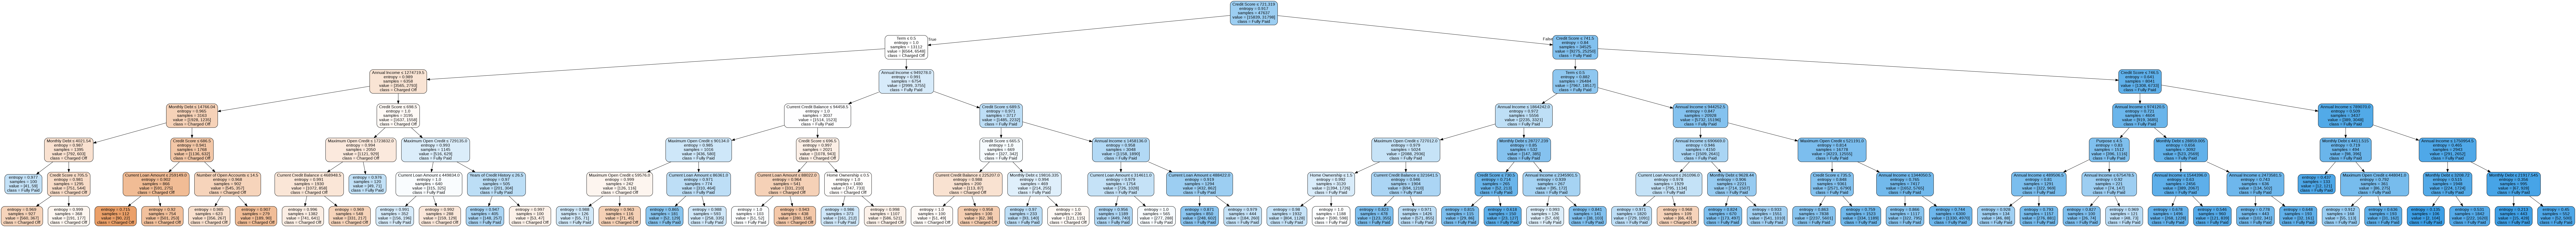

In [15]:
dot_data = tree.export_graphviz(clf, out_file=None,  
                                feature_names=attributes, 
                                class_names=clf.classes_,  
                                filled=True, rounded=True,  
                                special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png())

Apply the decision tree on the training set

In [0]:
y_pred = clf.predict(X_train)

Evaluate the performance

In [17]:
print('Accuracy %s' % accuracy_score(y_train, y_pred))
print('F1-score %s' % f1_score(y_train, y_pred, average=None))

Accuracy 0.693305623779835
F1-score [0.37633399 0.79665405]


In [18]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

 Charged Off       0.58      0.28      0.38     15839
  Fully Paid       0.71      0.90      0.80     31798

    accuracy                           0.69     47637
   macro avg       0.65      0.59      0.59     47637
weighted avg       0.67      0.69      0.66     47637



In [19]:
confusion_matrix(y_train, y_pred)

array([[ 4408, 11431],
       [ 3179, 28619]])

Apply the decision tree on the test set and evaluate the performance

In [0]:
y_pred = clf.predict(X_test)

In [21]:
print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))
confusion_matrix(y_test, y_pred)

Accuracy 0.688528605015674
F1-score [0.3568322  0.79450638]
              precision    recall  f1-score   support

 Charged Off       0.57      0.26      0.36      6788
  Fully Paid       0.71      0.90      0.79     13628

    accuracy                           0.69     20416
   macro avg       0.64      0.58      0.58     20416
weighted avg       0.66      0.69      0.65     20416



array([[ 1764,  5024],
       [ 1335, 12293]])

In [0]:
from sklearn.preprocessing import LabelBinarizer

In [23]:
lb = LabelBinarizer()
lb.fit(y_test)
lb.classes_.tolist()

['Charged Off', 'Fully Paid']

In [24]:
fpr = dict()
tpr = dict()
roc_auc = dict()
by_test = lb.transform(y_test)
by_pred = lb.transform(y_pred)
for i in range(1):
    fpr[i], tpr[i], _ = roc_curve(by_test[:, i], by_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    
roc_auc = roc_auc_score(by_test, by_pred, average=None)
roc_auc

0.5809551386370637

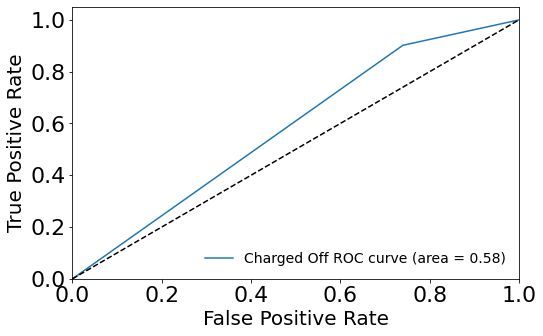

In [25]:
plt.figure(figsize=(8, 5))
for i in range(1):
    plt.plot(fpr[i], tpr[i], 
             label='%s ROC curve (area = %0.2f)' % (lb.classes_.tolist()[i], roc_auc))
    
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=20)
plt.ylabel('True Positive Rate', fontsize=20) 
plt.tick_params(axis='both', which='major', labelsize=22)
plt.legend(loc="lower right", fontsize=14, frameon=False)
plt.show()

### Cross Validation  
More options at [link](http://scikit-learn.org/stable/modules/cross_validation.html#)

In [0]:
from sklearn.model_selection import cross_val_score

In [27]:
scores = cross_val_score(clf, X, y, cv=10)
print('Accuracy: %0.4f (+/- %0.2f)' % (scores.mean(), scores.std() * 2))

scores = cross_val_score(clf, X, y, cv=10, scoring='f1_macro')
print('F1-score: %0.4f (+/- %0.2f)' % (scores.mean(), scores.std() * 2))

Accuracy: 0.6847 (+/- 0.00)
F1-score: 0.5787 (+/- 0.02)


In [28]:
scores

array([0.57238433, 0.5715764 , 0.57507083, 0.56166578, 0.5904544 ,
       0.57657429, 0.57959166, 0.59406865, 0.57590794, 0.58923858])

### Tuning the hyper-parameters

More options at [link](http://scikit-learn.org/stable/modules/grid_search.html#grid-search)

In [0]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [0]:
def report(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")

In [0]:
param_list = {'max_depth': [None] + list(np.arange(2, 20)),
              'min_samples_split': [2, 5, 10, 20, 30, 50, 100],
              'min_samples_leaf': [1, 5, 10, 20, 30, 50, 100],
             }

random_search = RandomizedSearchCV(clf, param_distributions=param_list, 
                                   n_iter=100)
random_search.fit(X, y)
clf = random_search.best_estimator_

In [0]:
report(random_search.cv_results_, n_top=10)

Model with rank: 1
Mean validation score: 0.686 (std: 0.002)
Parameters: {'min_samples_split': 5, 'min_samples_leaf': 100, 'max_depth': 6}

Model with rank: 2
Mean validation score: 0.686 (std: 0.002)
Parameters: {'min_samples_split': 10, 'min_samples_leaf': 50, 'max_depth': 6}

Model with rank: 3
Mean validation score: 0.686 (std: 0.003)
Parameters: {'min_samples_split': 5, 'min_samples_leaf': 50, 'max_depth': 7}

Model with rank: 4
Mean validation score: 0.686 (std: 0.002)
Parameters: {'min_samples_split': 20, 'min_samples_leaf': 5, 'max_depth': 6}

Model with rank: 5
Mean validation score: 0.686 (std: 0.002)
Parameters: {'min_samples_split': 30, 'min_samples_leaf': 1, 'max_depth': 6}

Model with rank: 6
Mean validation score: 0.685 (std: 0.004)
Parameters: {'min_samples_split': 30, 'min_samples_leaf': 5, 'max_depth': 4}

Model with rank: 6
Mean validation score: 0.685 (std: 0.004)
Parameters: {'min_samples_split': 20, 'min_samples_leaf': 30, 'max_depth': 4}

Model with rank: 6
Mean 

#ALTRI CLASSIFICATORI DI PROVA

# Random Forest

Sklearn [link](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) for more details.

In [0]:
from sklearn.ensemble import RandomForestClassifier

In [0]:
clf = RandomForestClassifier(n_estimators=20, 
                             criterion='gini', 
                             max_depth=6, 
                             min_samples_split=5, 
                             min_samples_leaf=100, 
                             class_weight=None)

scores = cross_val_score(clf, X, y, cv=10)
print('Accuracy: %0.4f (+/- %0.2f)' % (scores.mean(), scores.std() * 2))

scores = cross_val_score(clf, X, y, cv=10, scoring='f1_macro')
print('F1-score: %0.4f (+/- %0.2f)' % (scores.mean(), scores.std() * 2))

Accuracy: 0.6865 (+/- 0.00)
F1-score: 0.5348 (+/- 0.01)


In [0]:
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=6, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=100, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, n_estimators=20,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [0]:
clf.predict(X_test)

array(['Fully Paid', 'Fully Paid', 'Fully Paid', ..., 'Fully Paid',
       'Fully Paid', 'Fully Paid'], dtype=object)

# K-Nearest Neighbors

Sklearn [link](http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html) for more details.

In [0]:
from sklearn.neighbors import KNeighborsClassifier

In [0]:
clf = KNeighborsClassifier(n_neighbors=260)

scores = cross_val_score(clf, X, y, cv=10)
print('Accuracy: %0.4f (+/- %0.2f)' % (scores.mean(), scores.std() * 2))

scores = cross_val_score(clf, X, y, cv=10, scoring='f1_macro')
print('F1-score: %0.4f (+/- %0.2f)' % (scores.mean(), scores.std() * 2))

Accuracy: 0.6714 (+/- 0.01)
F1-score: 0.4674 (+/- 0.01)
